# Graded Project
Machine Learning - Unsupervised Learning

# RentTheRunway(E-commerce platform)

Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for
various occasions. The collected data is of several categories. This dataset
contains self-reported fit feedback from customers as well as other side
information like reviews, ratings, product categories, catalog sizes, customers’
measurements,etc.

# 1. Load the required libraries and read the dataset.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [2]:
df=pd.read_csv("renttherunway.csv")
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [3]:
df.shape

(192544, 16)

So this dataset got data with 16 columns(attributes) against which there is 192544 entries

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

# 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [5]:
len(df[df.duplicated()])

0

No duplicate values present

# 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) 

In [6]:
df=df.drop(columns=['user_id','Unnamed: 0','review_text','review_summary','review_date'],axis=1)
df.head()

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,126335,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,616682,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


Dropped the redundant columns

# 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs)

In [7]:
df['weight']=df['weight'].str.replace('lbs','').astype(float)

In [8]:
df['weight']

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

# 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. 

In [9]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [10]:
df['rented for']=df['rented for'].str.replace('party: cocktail','party')

In [11]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

party: cocktail replaced with party

# 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. 

In [12]:
df['height']=(df['height'].str.split("'",expand=True)[0].astype(float))*12+df['height'].str.split("'",expand=True)[1].str.split('"',expand=True)[0].astype(float)



In [13]:
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

# 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. 

In [14]:
df.isna().sum()/len(df)*100

fit            0.000000
bust size      9.561970
item_id        0.000000
weight        15.571506
rating         0.042588
rented for     0.005194
body type      7.601899
category       0.000000
height         0.351608
size           0.000000
age            0.498587
dtype: float64

In [15]:
for col in ['bust size','weight','rating','rented for','body type','height','age']:
    df[col].fillna(df[col].mode()[0],inplace=True)
df


,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,2260466,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,153475,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,34b,1063761,130.0,10.0,party,hourglass,sheath,64.0,4,116.0
3,fit,34c,126335,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,616682,145.0,10.0,wedding,athletic,gown,69.0,12,27.0
...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,2252812,140.0,10.0,work,hourglass,jumpsuit,69.0,8,42.0
192540,fit,32c,682043,100.0,10.0,work,petite,dress,61.0,4,29.0
192541,fit,36a,683251,135.0,6.0,everyday,straight & narrow,dress,68.0,8,31.0
192542,fit,36c,126335,165.0,10.0,wedding,pear,dress,66.0,16,31.0


In [16]:
df.isna().sum()/len(df)*100

fit           0.0
bust size     0.0
item_id       0.0
weight        0.0
rating        0.0
rented for    0.0
body type     0.0
category      0.0
height        0.0
size          0.0
age           0.0
dtype: float64

# 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [17]:
df.describe()

,item_id,weight,rating,height,size,age
count,1.925440e+05,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,1.045684e+06,136.240709,9.092758,65.306013,12.245175,33.856703
std,8.053148e+05,20.300468,1.429862,2.659925,8.494877,8.040513
min,1.233730e+05,50.000000,2.000000,54.000000,0.000000,0.000000
25%,1.950760e+05,125.000000,8.000000,63.000000,8.000000,29.000000
50%,9.483960e+05,130.000000,10.000000,65.000000,12.000000,32.000000
75%,1.678888e+06,145.000000,10.000000,67.000000,16.000000,37.000000
max,2.966087e+06,300.000000,10.000000,78.000000,58.000000,117.000000


# From the summary we can find:
    There are total 192544 entries
    Min weight is 136.24 lbs,max weight is 300 lbs,min weight is 50 lbs.
    Min rating is 2 while max is 10,more than 50% entries contain 10 rating
    Min height is 54 inch while max is 78 inch,maximum entries have height more than mean height of 65.30
    Min age is 0 while max age is 117 ,maximum entries are above age of 30

In [18]:
df[['fit','bust size','rented for','body type','category']].value_counts(normalize=True)

fit    bust size  rented for     body type  category
fit    34b        wedding        hourglass  dress       0.009785
                  formal affair  hourglass  gown        0.008627
                  wedding        athletic   dress       0.007557
                  formal affair  athletic   gown        0.006388
                  party          hourglass  dress       0.006238
                                                          ...   
       38d        formal affair  apple      shift       0.000005
                                 athletic   maxi        0.000005
                                 full bust  jumpsuit    0.000005
                                            maxi        0.000005
small  46ddd/e    formal affair  apple      dress       0.000005
Length: 20655, dtype: float64

In [19]:
df['fit'].unique()

array(['fit', 'small', 'large'], dtype=object)

In [20]:
df['bust size'].unique()

array(['34d', '34b', '34c', '32b', '34d+', '36d', '36a', '32d+', '36c',
       '32c', '32dd', '30dd', '32d', '36b', '34a', '34dd', '40ddd/e',
       '32a', '38d+', '38c', '34ddd/e', '38a', '38b', '38d', '36ddd/e',
       '38dd', '38f', '42dd', '36dd', '40g', '40dd', '28f', '30ddd/e',
       '32ddd/e', '28b', '36d+', '40d', '28dd', '34f', '42c', '30d',
       '30b', '42d', '34aa', '32aa', '36f', '28c', '40b', '36aa', '34g',
       '32f', '42ddd/e', '40c', '28g', '28aa', '36g', '30a', '44ddd/e',
       '30c', '30aa', '44dd', '32i', '32g', '30g', '38h', '30h', '34j',
       '38ddd/e', '32h', '28a', '44d', '40h', '38g', '34h', '36j', '40f',
       '36h', '28ddd/e', '44f', '34i', '30f', '36i', '30i', '28h', '42b',
       '42j', '32j', '46c', '48d', '38aa', '38i', '48dd', '28d', '28i',
       '46ddd/e', '42g', '44c', '42f', '40j', '38j', '46f', '44b', '44g',
       '42h', '40i', '44h'], dtype=object)

In [21]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work'], dtype=object)

In [22]:
df['body type'].unique()

array(['hourglass', 'straight & narrow', 'pear', 'athletic', 'full bust',
       'petite', 'apple'], dtype=object)

In [23]:
df['category'].unique()

array(['romper', 'gown', 'sheath', 'dress', 'leggings', 'top', 'jumpsuit',
       'sweater', 'jacket', 'shirtdress', 'maxi', 'shift', 'pants',
       'shirt', 'mini', 'skirt', 'pullover', 'blouse', 'suit', 'coat',
       'trench', 'bomber', 'cape', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'culottes', 'down',
       'trouser', 'midi', 'pant', 'legging', 'print', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'kaftan', 'overalls', 'jogger', 'tee',
       'combo', 'henley', 'cami', 'blouson', 'turtleneck', 'trousers',
       'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight', 'kimono',
       'for', 'crewneck', 'skirts', 'parka', 'buttondown', 'skort',
       'sweatershirt', 'sweatpants', 'jeans'], dtype=object)

From above we can see different unique categorical entries 

# 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

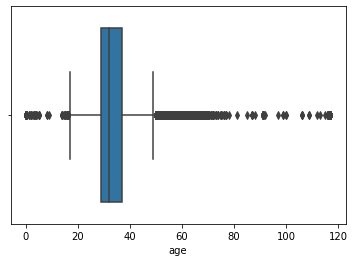

In [24]:
sns.boxplot(df['age'])
plt.show()

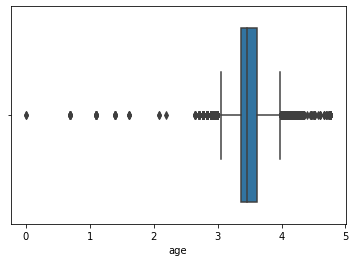

In [25]:
## let use log transformation and transform the column age and visualize the distribution
age_log = np.log(df['age'])
sns.boxplot(age_log)
plt.show()

# 11. Check the distribution of the different categories in the column 'rented for'using appropriate plot.

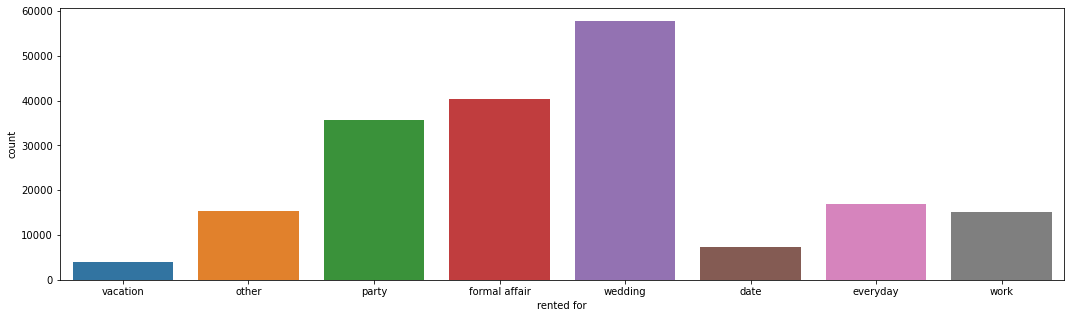

In [26]:
plt.figure(figsize=(18,5))
sns.countplot(df['rented for'])
plt.show()

# 12 Encode the categorical variables in the dataset.

In [27]:
le=LabelEncoder()

In [28]:
df.iloc[:,[0,1,5,6,7]]=df.iloc[:,[0,1,5,6,7]].apply(le.fit_transform)

In [29]:
df.iloc[:,[0,1,5,6,7]].head()

,fit,bust size,rented for,body type,category
0,0,39,5,3,44
1,0,37,3,6,20
2,0,37,4,3,45
3,0,38,2,4,16
4,0,37,6,1,20


# 13. Standardize the data, so that the values are within a particular range.

In [30]:
df1=df.copy()
scaled_feature=StandardScaler().fit_transform(df1.values)
scaled_feature_df=pd.DataFrame(scaled_feature,index=df1.index,columns=df1.columns)

In [31]:
scaled_feature_df

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,-0.556291,-0.004640,1.508460,0.037403,0.634498,0.514420,0.020953,1.569310,1.012808,0.206575,-0.728401
1,-0.556291,-0.187210,-1.107903,-0.208898,0.634498,-0.456753,1.927582,-0.307247,0.260905,-0.028862,0.266563
2,-0.556291,-0.187210,0.022448,-0.307418,0.634498,0.028833,0.020953,1.647500,-0.490998,-0.970608,10.216203
3,-0.556291,-0.095925,-1.141604,-0.061117,-0.764242,-0.942340,0.656496,-0.620006,-0.115046,-0.499735,0.017822
4,-0.556291,-0.187210,-0.532714,0.431483,0.634498,1.000007,-1.250132,-0.307247,1.388760,-0.028862,-0.852772
...,...,...,...,...,...,...,...,...,...,...,...
192539,-0.556291,0.177930,1.498956,0.185183,0.634498,1.485593,0.020953,0.161892,1.388760,-0.499735,1.012786
192540,-0.556291,-1.282633,-0.451552,-1.785220,0.634498,1.485593,1.292039,-0.620006,-1.618852,-0.970608,-0.604031
192541,-0.556291,0.816927,-0.450052,-0.061117,-2.162982,-1.427926,1.927582,-0.620006,1.012808,-0.499735,-0.355290
192542,-0.556291,1.090783,-1.141604,1.416685,0.634498,1.000007,0.656496,-0.620006,0.260905,0.442012,-0.355290


# 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. 

In [32]:
## step1: calculate the covariance matrix
cov_matrix=np.cov(scaled_feature.T)
cov_matrix

array([[ 1.00000519e+00,  9.05525666e-03,  2.36767713e-02,
         1.41240336e-02, -2.45044635e-01,  8.35378787e-03,
        -7.61016810e-03,  3.35892077e-04,  1.06689491e-04,
         6.54006939e-02,  1.58535634e-03],
       [ 9.05525666e-03,  1.00000519e+00, -4.74223785e-02,
         5.53905519e-01, -2.09457651e-02, -2.07814670e-03,
        -2.15702411e-01, -1.09647683e-02,  1.47008395e-01,
         6.27115858e-01,  1.65407124e-01],
       [ 2.36767713e-02, -4.74223785e-02,  1.00000519e+00,
        -2.73333412e-02, -1.46500776e-03, -6.25903069e-02,
         7.42619903e-03,  3.01331416e-01,  4.57632073e-03,
        -4.43115259e-02,  2.62801213e-02],
       [ 1.41240336e-02,  5.53905519e-01, -2.73333412e-02,
         1.00000519e+00, -2.09651667e-02,  9.19429998e-03,
        -2.29920750e-01, -1.34802562e-02,  3.43259194e-01,
         6.99741338e-01,  6.62728926e-02],
       [-2.45044635e-01, -2.09457651e-02, -1.46500776e-03,
        -2.09651667e-02,  1.00000519e+00,  1.27900970e-02,
  

In [33]:
## step2: calculate eigen values and eigen vector
eig_vals,eig_vectors=np.linalg.eig(cov_matrix)
print('Eigen Values:','\n',eig_vals)
print('\n')
print('Eigen vectors:','\n',eig_vectors)

Eigen Values: 
 [2.52747712 0.27672864 0.42197939 1.3385435  1.23748048 1.0421332
 0.68756971 0.76135726 0.97796458 0.84042843 0.88839483]


Eigen vectors: 
 [[-3.80025388e-02 -5.61677710e-02 -3.19027181e-02  1.98992911e-01
  -6.70713881e-01  1.32689727e-01  2.38899071e-01 -6.54072909e-01
   4.34219443e-03 -4.89306838e-02 -4.91427003e-03]
 [-4.98759680e-01 -1.65376202e-01 -7.76840667e-01 -6.00726012e-03
   1.87095022e-02 -1.77538586e-01 -4.52923910e-02  2.68023718e-02
  -8.78205447e-02 -2.54217102e-01 -1.15730026e-01]
 [ 4.16507371e-02  2.05524317e-02 -2.20077447e-02  6.44714949e-01
   2.00756003e-01  1.27195387e-01 -6.67066314e-01 -2.34595786e-01
  -1.50394602e-01  4.20081985e-02 -2.86983152e-02]
 [-5.38338662e-01 -6.35971796e-01  5.02963743e-01 -9.38704256e-03
   4.53577595e-02  1.11946406e-01 -5.14381100e-02  2.15371499e-02
   1.82654010e-02 -5.57083517e-02 -1.77579893e-01]
 [ 3.67925081e-02 -8.26694550e-03  1.48660962e-03 -2.16973280e-01
   6.66555268e-01 -1.93792666e-02  2.3384807

In [34]:
## Step3 : screen plot
total=sum(eig_vals)
print(total)
var_exp=[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print('Explained variance:',var_exp)
print('Cummulative Variance Explained:',cum_var_exp)


11.000057130095612
Explained variance: [22.97694540030642, 12.168514116888996, 11.249764142905128, 9.473888975736202, 8.890540877936408, 8.076274647717272, 7.640218745052241, 6.92139365914612, 6.250601235655316, 3.8361563526070444, 2.5157018460488576]
Cummulative Variance Explained: [ 22.9769454   35.14545952  46.39522366  55.86911264  64.75965351
  72.83592816  80.47614691  87.39754057  93.6481418   97.48429815
 100.        ]


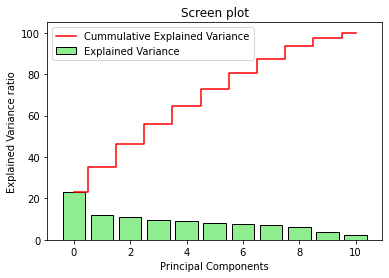

In [35]:
plt.bar(range(11),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(11),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance ratio')
plt.title('Screen plot')
plt.legend(loc='best')
plt.show()

# 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)
a. Find the optimal K Value using elbow plot for K Means clustering.
b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.
c. Compute silhouette score for evaluating the quality of the K Means clustering technique.


In [36]:
%%time
pca=PCA(n_components=6)
#scikit learn principal component analysis method

pca_df=pd.DataFrame(pca.fit_transform(scaled_feature_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
pca_df.head()

CPU times: total: 1.02 s
Wall time: 1.11 s


,PC1,PC2,PC3,PC4,PC5,PC6
0,0.167921,1.504853,-1.488217,-1.419038,0.628435,0.402823
1,-0.601260,-1.017057,-0.455386,0.765763,-0.715604,1.675219
2,0.413996,2.330457,-0.819491,7.905558,1.987707,-1.813347
3,-0.487229,-0.852129,0.449364,0.643854,-1.204511,0.357056
4,0.687381,-1.149407,-0.785334,-1.682254,0.283629,-0.876967


In [37]:
pd.Series(pca.explained_variance_ratio_).cumsum()*100

0    22.976945
1    35.145460
2    46.395224
3    55.869113
4    64.759654
5    72.835928
dtype: float64

In [38]:
## finding optimal k value by Kmeans clustering using elbow plot
cluster_errors=[]
cluster_range=range(1,11)
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,random_state=100,n_init=6)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,1.542653e+06
1,2,1.245937e+06
2,3,1.103914e+06
3,4,9.907711e+05
4,5,8.945197e+05
5,6,8.384942e+05
6,7,7.905538e+05
7,8,7.569360e+05
8,9,7.269940e+05
9,10,7.029219e+05


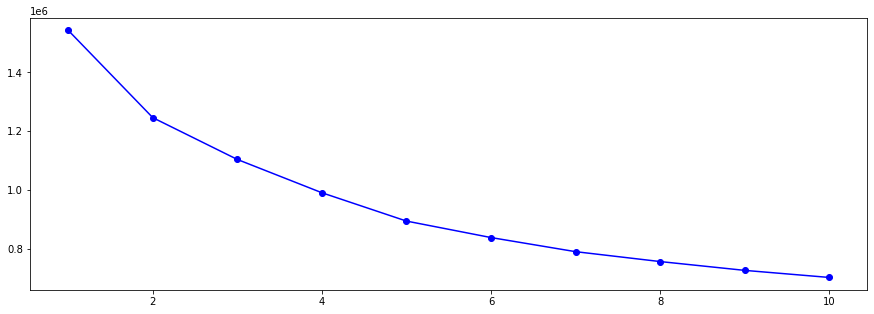

In [39]:
##creating a dataframe of number of clusters and cluster errors
cluster_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})

##elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [40]:
## applying KMeans clustering for  the optimal number of cluster obtained above.
kmeans = KMeans(n_clusters=2,n_init=11,random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=2, n_init=11, random_state=100)

In [41]:
## obtained labels from kmeans clustering
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 1])

In [42]:
## creating a dataframe of the labels
label = pd.DataFrame(kmeans.labels_,columns=['Label'])
label.head()

,Label
0,0
1,0
2,1
3,0
4,1


In [43]:
#from sklearn.metrics import silhouette_score

#kmeans_score = []

#for i in range(2,11):
 #   kmeans = KMeans(n_clusters=i)
  #  kmeans = kmeans.fit(pca_df)
   # labels = kmeans.predict(pca_df)
    #print(i,silhouette_score(pca_df,labels))

# 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data)
a. Find the optimal K Value using dendrogram for Agglomerative clustering.
b. Build a Agglomerative clustering model using the obtained optimal K
value observed from dendrogram.
c. Compute silhouette score for evaluating the quality of the Agglomerative
clustering technique. (Hint: Take a sample of the dataset for agglomerative
clustering to reduce the computational time)

In [45]:
plt.figure(figsize=[18,5])
merg=linkage(scaled_feature,method='ward')
dendrogram(merg,leaf_rotation=90)
plt.xlabel('Datapoints')
plt.ylabel('Euclieadn distance')
plt.show()

MemoryError: Unable to allocate 138. GiB for an array with shape (18536499696,) and data type float64

<Figure size 1296x360 with 0 Axes>